In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
smoke_df = pd.read_json('/content/drive/MyDrive/AUT 2023/DATA 512/P1/smoke_estimate_NP.json')
smoke_df.head()

,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,...,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,distance,smoke_estimate
0,14299,14299,Wildfire,1963,1,"1 (1), 3 (3)",40992.458271,16589.059302,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,None,None,0.385355,NaN,No,73550.428118,1.658906e+08,834.453121,98.249877
1,14300,14300,Wildfire,1963,1,"1 (1), 3 (3)",25757.090203,10423.524591,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (2)",...,Prescribed fire data in this dataset represent...,None,None,0.364815,NaN,No,59920.576713,1.042352e+08,860.579136,59.859899
2,14301,14301,Wildfire,1963,1,"1 (5), 3 (15), 5 (1)",45527.210986,18424.208617,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (6), Likely Wildfire (15)",...,Prescribed fire data in this dataset represent...,None,None,0.320927,NaN,No,84936.827810,1.842421e+08,826.551127,110.161875
3,14302,14302,Wildfire,1963,1,"1 (1), 3 (3), 5 (1)",10395.010334,4206.711433,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,None,None,0.428936,NaN,No,35105.903602,4.206711e+07,782.078523,26.583035
4,14303,14303,Wildfire,1963,1,"1 (1), 3 (3)",9983.605738,4040.221900,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,None,None,0.703178,NaN,No,26870.456126,4.040222e+07,820.831455,24.325592


# Visualization 1

Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

Calculating the number of fires for each distance bucket (0-50, 50-100 etc.)

In [20]:
dist_bins = list(np.arange(26)*50)
res_dict = dict()
for i in range(len(dist_bins)-1):
  first_milestone = dist_bins[i]
  second_milestone = dist_bins[i+1]
  key = str(first_milestone)+'-'+str(second_milestone)
  df_dist = smoke_df[(smoke_df['distance']>first_milestone) & (smoke_df['distance']<second_milestone)]
  val = len(df_dist)
  res_dict[key] = val


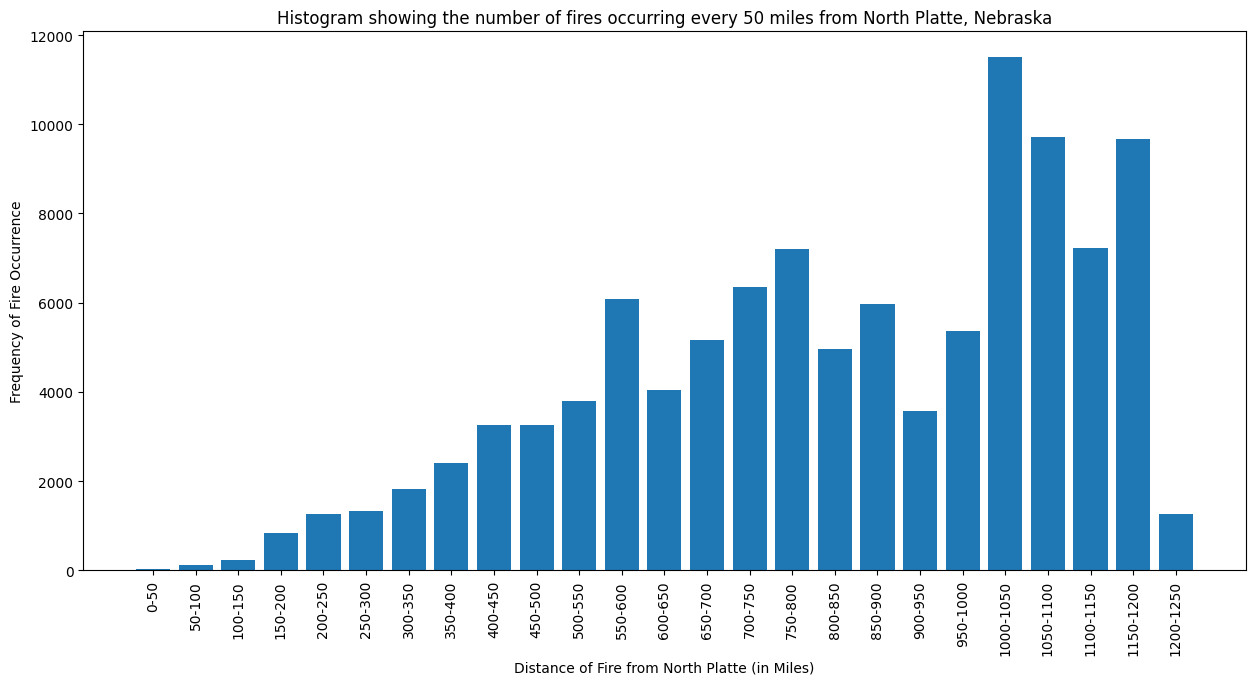

In [216]:
plt.figure(figsize=(15,7))
plt.bar(res_dict.keys(),res_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Distance of Fire from North Platte (in Miles)')
plt.ylabel('Frequency of Fire Occurrence')
plt.title('Histogram showing the number of fires occurring every 50 miles from North Platte, Nebraska')
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/P1/Fire Frequency-Distance Histogram.png')
plt.show()

# Visualization 2

Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

Group the data by year and summation of total acres burnt.

In [35]:
area_burnt = smoke_df.groupby('Fire_Year').sum()['GIS_Acres']
area_df = area_burnt.to_frame()
area_df.head()

<ipython-input-35-3de0036c6317>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  area_burnt = smoke_df.groupby('Fire_Year').sum()['GIS_Acres']


,GIS_Acres
Fire_Year,
1963,247513.600778
1964,441232.674606
1965,239183.532546
1966,696780.549290
1967,483240.535527


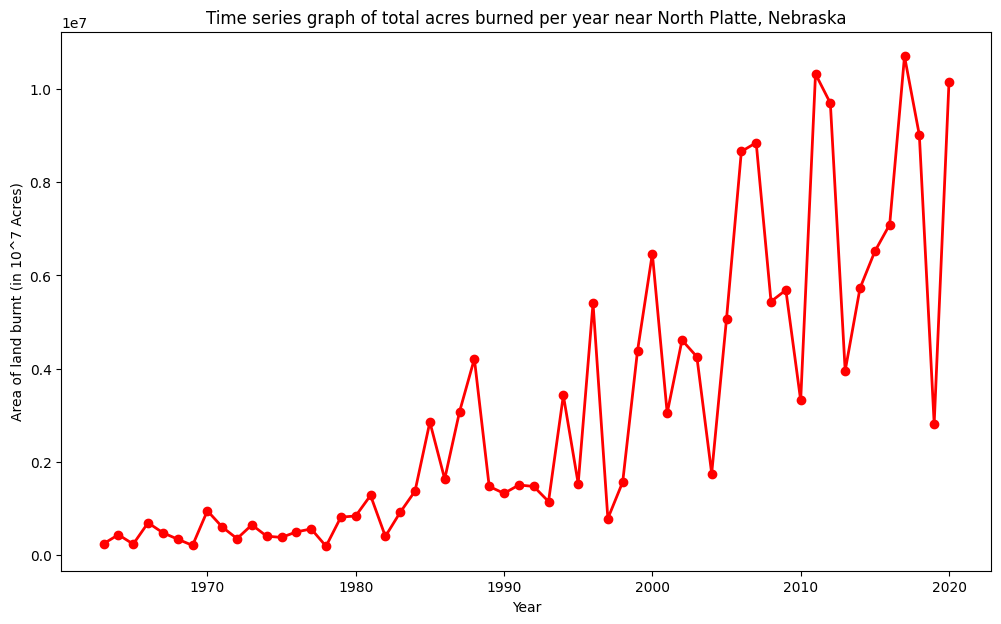

In [217]:
plt.figure(figsize=(12,7))
plt.plot(area_df.index, area_df['GIS_Acres'],color='red',linestyle='-' ,marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Area of land burnt (in 10^7 Acres)')
plt.title('Time series graph of total acres burned per year near North Platte, Nebraska')
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/P1/Total Acres Burnt per Year.png')
plt.show()

# Visualization 3

Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

Group by year and take the average of smoke estimate for each year.

In [70]:
smoke_df.groupby('Fire_Year').mean()['smoke_estimate'].head()

<ipython-input-70-e69e9fb0e918>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoke_df.groupby('Fire_Year').mean()['smoke_estimate'].head()


Fire_Year
1963    1.635091
1964    2.694114
1965    3.192331
1966    3.957877
1967    2.192414
Name: smoke_estimate, dtype: float64

These values seem suspiciously small. Plotting a histogram to see the distribution of smoke estimate values. I suspect it is heavily skewed.

Text(0, 0.5, 'Frequency of value occurence')

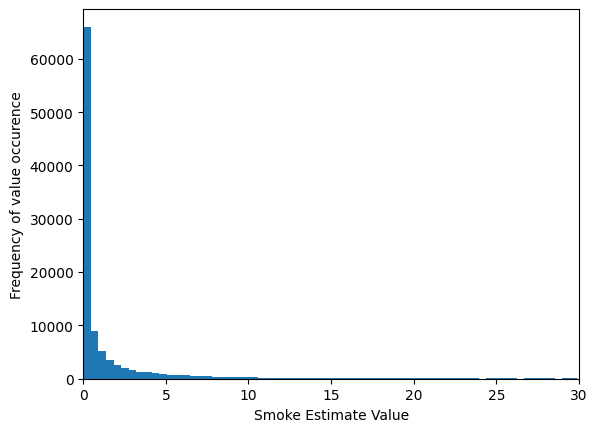

In [56]:
plt.hist(smoke_df['smoke_estimate'],bins=10000)
plt.xlim(0,30)
plt.xlabel('Smoke Estimate Value')
plt.ylabel('Frequency of value occurence')

My data is organized by each fire, I first need to aggregate by year to gain a single estimate per year. If I group by and average out the estimate, there are far too many results with a really low smoke estimate. These would significantly skew the results and birng down the yearly average. This can be seen in the histogram above.

Hence, I am filtering out results with smoke estimate below 5. This would significantly truncate the dataset but would also be more representative to include fires which could impact air quality more.

In [57]:
smoke_wfs = smoke_df[smoke_df['smoke_estimate']>5]

In [100]:
smoke_year = smoke_wfs.groupby('Fire_Year').mean()['smoke_estimate']
smoke_final = smoke_year.to_frame()
smoke_final.reset_index(inplace=True)
smoke_final.head()

<ipython-input-100-69e327bf32f6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoke_year = smoke_wfs.groupby('Fire_Year').mean()['smoke_estimate']


,Fire_Year,smoke_estimate
0,1963,22.140731
1,1964,25.937501
2,1965,58.268129
3,1966,35.503025
4,1967,24.378789


Much better distribution of values and more representative of the fire spread effects

In [63]:
aqi_df = pd.read_csv('/content/drive/MyDrive/AUT 2023/DATA 512/P1/aqi.csv')
aqi_df.head()

,Unnamed: 0,Year,avg_aqi
0,0,1985,24
1,1,1986,32
2,2,1987,36
3,3,1988,27
4,4,1989,26


Merge the AQI and Smoke Estimate data.

AQI Data: 1985-2022

Smoke Estimate Data: 1963-2020

An inner join is needed to properly merge these dataframes, our resulting data will have data from 1985 up to 2020.


In [65]:
aqi_smoke = smoke_final.merge(aqi_df,left_on='Fire_Year',right_on='Year')
aqi_smoke = aqi_smoke[['Fire_Year','smoke_estimate','avg_aqi']]
aqi_smoke.head()

,Fire_Year,smoke_estimate,avg_aqi
0,1985,30.221308,24
1,1986,24.300950,32
2,1987,24.994092,36
3,1988,53.752523,27
4,1989,29.500494,26


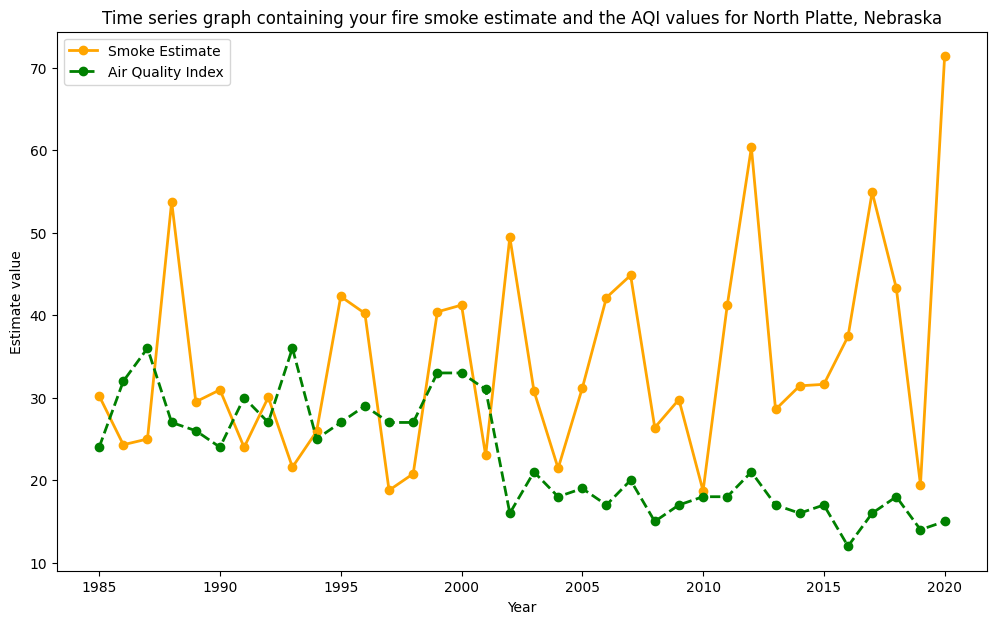

In [218]:
plt.figure(figsize=(12,7))
plt.plot(aqi_smoke['Fire_Year'],aqi_smoke['smoke_estimate'],color='orange',linestyle = '-', marker = 'o', linewidth=2,label='Smoke Estimate')
plt.plot(aqi_smoke['Fire_Year'],aqi_smoke['avg_aqi'],color='green',linestyle = '--', marker = 'o', linewidth=2,label='Air Quality Index')
plt.xlabel('Year')
plt.ylabel('Estimate value')
plt.title('Time series graph containing your fire smoke estimate and the AQI values for North Platte, Nebraska')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/P1/Smoke Estimate vs AQI Values.png')
plt.show()

I see a decent correlation between the Air Quality Index and the smoke estimate I created. It is trying to follow similar patterns, and the scaling is similar.

#PREDICTION MODEL FOR NEXT 25 YEARS

Develop a predictive model based on the fire data and smoke estimate for your assigned city. Your model should predict smoke estimates for every year for the next 25 years (i.e., 2024-2049). You should be careful to make sure your predictions convey appropriate levels of uncertainty in the prediction.


In [101]:
smoke_pred = smoke_final.rename(columns = {'Fire_Year':'ds', 'smoke_estimate':'y'})
smoke_pred['ds'] = pd.to_datetime(smoke_pred['ds'], format='%Y')
smoke_pred.head()

,ds,y
0,1963-01-01,22.140731
1,1964-01-01,25.937501
2,1965-01-01,58.268129
3,1966-01-01,35.503025
4,1967-01-01,24.378789


I am using Facebook's Prophet library. This is apackage specifically for accurate time series analysis and helps with forecasting.

Now in our data, there is no clear trend nor is there seasonality. Time series automatically look for trends, hence we need to account for this. Also, we have around 60 years of data and 25 years to be predicted, so it is almost impossible to get an accurate predictions. However, I try tuning my hyperparameters in the best possible way.



1.   changepoint_prior_scale: How flexible should the model be w.r.t trend?
As our data has no clear trends, let this be a very high value.

2.   seasonality_prior_scale: How flexible should the model be w.r.t seasonality?
As our data has no clear seasoanlity, let this be a very high value.

3.   interval_width: Degree of uncertainty in the model predictions?
As we know there is no good trend, let the model be irregular and not try to find specific patterns.

4.   growth: How should the forecasts grow? There is no clear growth structure, but it is gradually sloping upwards. A logistic equation ensures foe exponential growth, better than linear growth for smaller number of data points. I cap the mean of the future predictions to 30 to ensure it is within range.



In [219]:
model = Prophet(changepoint_prior_scale=1000000,seasonality_prior_scale=1000000,interval_width = 0.95,growth='logistic')
smoke_pred['cap'] = 30
model.fit(smoke_pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpunpfddcb/erh52h8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpunpfddcb/rolj87pb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77341', 'data', 'file=/tmp/tmpunpfddcb/erh52h8r.json', 'init=/tmp/tmpunpfddcb/rolj87pb.json', 'output', 'file=/tmp/tmpunpfddcb/prophet_model9l_ww9op/prophet_model-20231109005252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Generate future data points, 29 years into the future: 2020-2049

In [220]:
future = model.make_future_dataframe(periods=29, freq='AS')
future['cap'] = 30
future.tail()

,ds,cap
82,2045-01-01,30
83,2046-01-01,30
84,2047-01-01,30
85,2048-01-01,30
86,2049-01-01,30


Run the model to predict future values!

In [221]:
forecast = model.predict(future)

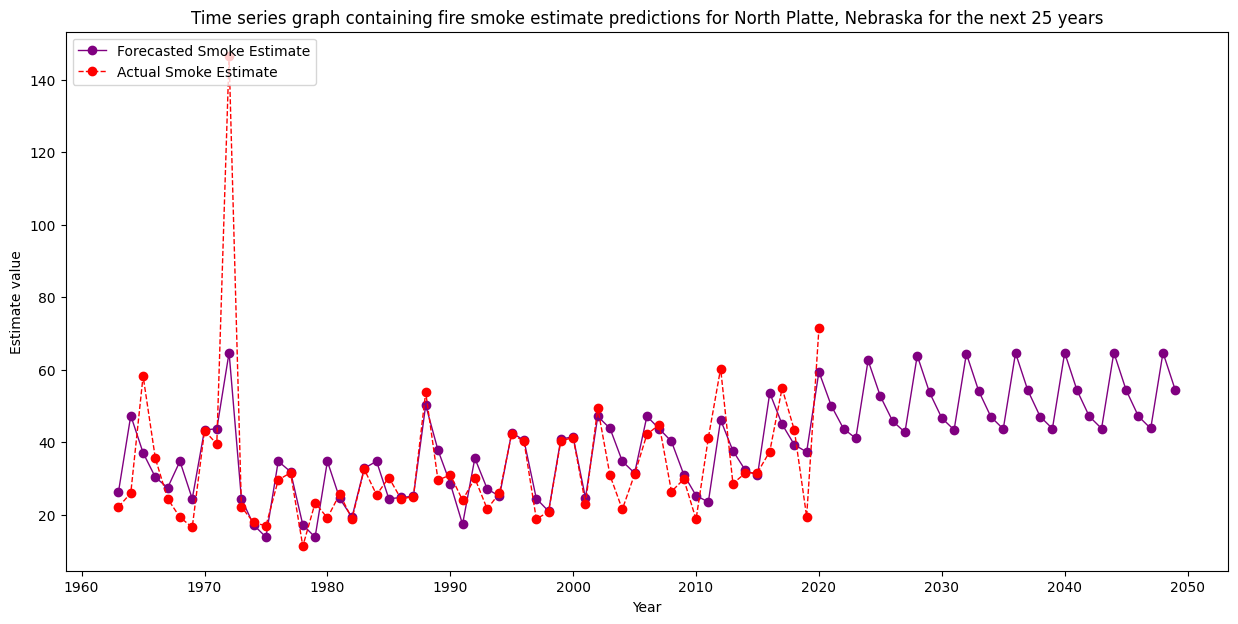

In [222]:
plt.figure(figsize=(15,7))
plt.plot(forecast['ds'],forecast['yhat'],color='purple',linestyle = '-', marker = 'o', linewidth=1,label='Forecasted Smoke Estimate')
plt.plot(smoke_pred['ds'],smoke_pred['y'],color='red',linestyle = '--', marker = 'o', linewidth=1,label='Actual Smoke Estimate')
plt.xlabel('Year')
plt.ylabel('Estimate value')
plt.title('Time series graph containing fire smoke estimate predictions for North Platte, Nebraska for the next 25 years')
plt.legend(loc="upper left")
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/P1/Forecasted Smoke Estimates for 25 future years.png')
plt.show()

I think the model is doing a great job at modelling expected values for the training data. Of course the predicted points will not be perfect and will have some trend because they cannot be entirely random.

The model's almost perfect replication of training data points is maybe overfitting, but it works okay with such messy data!

In [214]:
future_forecast = forecast[['ds','yhat']]
future_forecast.tail(26)

,ds,yhat
61,2024-01-01,62.570276
62,2025-01-01,52.659502
63,2026-01-01,45.805366
64,2027-01-01,42.736179
65,2028-01-01,63.910609
66,2029-01-01,53.722787
67,2030-01-01,46.645352
68,2031-01-01,43.397239
69,2032-01-01,64.429294
70,2033-01-01,54.128527


Saving the last 25 year predictions to a csv file

In [215]:
future_forecast = future_forecast.tail(26)
future_forecast.to_csv('/content/drive/MyDrive/AUT 2023/DATA 512/P1/future_predicted_smoke_estimate.csv')